In [1]:
import pandas as pd

before_corona = pd.read_csv("../data/코로나이전명지_final.csv") # 코로나 이전 전체 DATA
after_corona = pd.read_csv("../data/코로나이후명지_final.csv") # 코로나 이후 전체 DATA
keyword_corona = pd.read_csv("../data/코로나_이후_명지.csv") # 코로나 검색어 기준 서울 + 용인
corona = pd.read_csv("../data/corona/Time.csv") # 코로나 확진자 데이터 1/20 ~ 5/31
corona_after_may = pd.read_csv("../data/코로나_19_발생현황.csv",  encoding='CP949') # 1/31 ~ 11/26
seoul = pd.read_csv("../data/everytime_seoul.csv") # 인문캠 코로나 검색 결과 
yongin = pd.read_csv("../data/everytime_yongin.csv") # 용인캠 코로나 검색 결과

In [2]:
corona_after_may = corona_after_may.transpose()
corona_after_may = corona_after_may.reset_index()
del corona_after_may[0]
del corona_after_may[1]
corona_after_may = corona_after_may.drop(0)
corona_after_may.columns=['date','confirmed']
corona_after_may['date'] = corona_after_may['date'].str.replace(".","-")
corona_after_may['date'] = corona_after_may['date'].str.replace(" ","")
corona['date'] = pd.to_datetime(corona['date'], format = '%Y-%m-%d')
corona_after_may['date'] = pd.to_datetime(corona_after_may['date'], format = '%Y-%m-%d')

In [3]:
after_corona

,Unnamed: 0,vote,data,comment,title,content
0,0,0,5,5분 전,밑에 애가,문장끝말잇기 안해줌 해줄사람..
1,1,0,54,13분 전,끝말잇기할사람,끝장단어말고 어려운단어쓰지말고
2,2,0,7,20분 전,뮤지컬본다하면,홍광호 vs 조승우
3,3,0,0,26분 전,글경전 이정환교수님,개인프로젝트 기업뭘로해야되나..ㅜ
4,4,0,0,29분 전,유라시아 ㅊㅁㅇ교수님,유라시아 ㅊㅁㅇ 교수님 13주차 과제 기말고사 예상문제 몇개 내야해요??
...,...,...,...,...,...,...
50455,18455,0,1,06/16 17:52,함박관 출구 어디야 알려주세요...,맴맴 돌고 있어요... ㅋㅋ
50456,18456,0,1,06/16 17:48,함박관 차세대나 창조예술관 근처인가용?,아아ㅠㅠ
50457,18457,0,0,06/16 17:45,늦겠누,빨간버스인데 지금 쌍용아파트네...하
50458,18458,0,0,06/16 17:44,ㅈㄱㄴ,kcu성적확인 어캐하나요?


In [4]:
corona

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
128,2020-05-27,0,852876,820550,11265,10295,269
129,2020-05-28,0,868666,834952,11344,10340,269
130,2020-05-29,0,885120,849161,11402,10363,269
131,2020-05-30,0,902901,865162,11441,10398,269


In [5]:
corona_after_may = corona_after_may.iloc[120:]

In [6]:
corona = pd.concat([corona, corona_after_may], axis=0)

In [7]:
corona = corona[['date','confirmed']]

In [8]:
corona # 1-20 ~ 11-26 사이의 코로나 확진자 데이터

,date,confirmed
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,1
3,2020-01-23,1
4,2020-01-24,2
...,...,...
295,2020-11-22,330
296,2020-11-23,271
297,2020-11-24,349
298,2020-11-25,382


# 학생상담 센터 빅데이터 공모전

# 빅데이터로 바라본 포스트 코로나 명지

### - 빅데이터를 활용한 명지인의 심리와 정신건강에 대한 탐구

### -  비정형 데이터를 통한 명지인의 코로나 블루 원인 분석과 이를 해소하기 위한 적합 상담 프로그램 도출

## ANALYSITS 김동현 김민지 이희경 정진규

--------------

# EDA

### 분석 진행 절차

- 데이터를 명지대로 좁힐 수 있고 실질적으로 익명 기능을 통해 대학생들이 자신의 속마음을 털어놓는 SNS인 에브리타임을 선택
- 비정형 데이터 수집을 위해 셀레니움, Bs4 라이브러리 사용 (코로나 이전 33100개 게시물, 이후 50460개 게시물)
- 수집한 데이터를 바탕으로 생성한 워드클라우드를 통해 코로나 이전과 이후의 차이점 분석
- 수집한 데이터를 통해 감성분석 실시
- Dacon과 질병관리본부의 확진자 데이터를 통해 명지인의 심리에 영향을 미치는 요인 분석
- 시계열 분석과 LSTM 기법을 활용해 앞으로의 명지인의 감성 예측
- Topic Modeling LDA 기법을 활용해 학생상담센터에 필요한 상담 프로그램 제시

###  사용한 데이터 셋
1. 에브리타임(SNS)에 게시된 코로나 이전 데이터(인문 + 자연)
2. 에브리타임(SNS)에 게시된 코로나 이후 데이터(인문 + 자연)
3. 에브리타임(SNS)에 게시된 코로나 키워드 기준 데이터(인문 + 자연)
4. Dacon, 통계청 코로나 확진자 데이터 1/20 ~ 11/26
5. 설문조사(코로나 이후 심리 변화)

-------------

# 데이터 설명

### 1) 코로나 이전 Data 설명
- vote (추천수)
- date (게시글 작성일) 
- comment (댓글수)
- title (게시글 제목)
- content (게시글 내용)
- (33100 행, 6 열)

In [9]:
del before_corona['Unnamed: 0']

In [10]:
before_corona.columns=['vote','comment','date','title','content']
before_corona.head()

,vote,comment,date,title,content
0,0,2,01/01 01:10,반오십이여!,일어나라!!
1,0,0,01/01 01:03,모두 해피 뉴 이어!!!,새해 복 많이 받아랑
2,15,3,01/01 00:38,다들 새해 복 많이 받아요,♥️🙏🏻
3,0,6,01/01 00:31,예체능 쪽으로 톱 찍은 사람이 그 머리+노력으로 공부도 잘할까?,어제 우리 형이랑 논쟁함. 나는 양자가 아예 다른 영역이라 예술에서 톱 찍어도 공부...
4,0,2,01/01 00:31,짧고 굵은 새해 인사말 추천좀,"해피뉴이어, 새해 복 많이 받으세요 말고"


In [11]:
before_corona.tail()

,vote,comment,date,title,content
33095,0,3,19/06/13 15:53,명지대에서 용터까지 무료면,용터에서 명지대까지도 무료죠?
33096,0,3,19/06/13 15:49,"지갑주워서 글올렸는데 주인이안나타나요,,","어디로 보내야할까요 과사,,?"
33097,0,3,19/06/13 15:32,공학특론 수업은 있음. 성적엔 안들감,끝
33098,0,8,19/06/13 15:31,면접 경쟁률 4:1,응시자 평균연령 30대 중반 나 20대중반 가능성있어보이냐?
33099,0,7,19/06/13 15:15,난 종강 ㅋㅋ,ㅂㅂ


In [13]:
before_corona.shape

(33100, 5)

### 2) 코로나 이후 Data 설명
- vote (추천수)
- date (게시글 작성일) 
- comment (댓글수)
- title (게시글 제목)
- content (게시글 내용)
- (50460 행, 6 열)

In [12]:
del after_corona['Unnamed: 0']

In [13]:
after_corona.columns=['vote','comment','date','title','content']
after_corona.head()

,vote,comment,date,title,content
0,0,5,5분 전,밑에 애가,문장끝말잇기 안해줌 해줄사람..
1,0,54,13분 전,끝말잇기할사람,끝장단어말고 어려운단어쓰지말고
2,0,7,20분 전,뮤지컬본다하면,홍광호 vs 조승우
3,0,0,26분 전,글경전 이정환교수님,개인프로젝트 기업뭘로해야되나..ㅜ
4,0,0,29분 전,유라시아 ㅊㅁㅇ교수님,유라시아 ㅊㅁㅇ 교수님 13주차 과제 기말고사 예상문제 몇개 내야해요??


In [14]:
after_corona.tail()

,vote,comment,date,title,content
50455,0,1,06/16 17:52,함박관 출구 어디야 알려주세요...,맴맴 돌고 있어요... ㅋㅋ
50456,0,1,06/16 17:48,함박관 차세대나 창조예술관 근처인가용?,아아ㅠㅠ
50457,0,0,06/16 17:45,늦겠누,빨간버스인데 지금 쌍용아파트네...하
50458,0,0,06/16 17:44,ㅈㄱㄴ,kcu성적확인 어캐하나요?
50459,0,1,06/16 17:36,학교 도서관 열람실,열려있나요??


In [17]:
after_corona.shape

(50460, 5)

### 3) 코로나 검색어 관련 데이터 설명
- vote (추천수)
- date (게시글 작성일) 
- comment (댓글수)
- title (게시글 제목)
- content (게시글 내용)
- (1957 행, 5 열)

In [18]:
keyword_corona.head()

,Unnamed: 0,recommend,comment,date,title,content
0,0,18,8,01/24 23:07,코로나 바이러스 우한 폐렴 있잖아,우리학교 중국인 엄청 많은데 나만 걱정돼 ㄷㄷㄷㄷ ㅠㅠ
1,1,0,5,01/26 10:00,코로나때문에,알바하는데 손님없다 ㅋㅋㅋㅋㅋㅋ
2,2,0,6,01/26 10:27,코로나 예방수칙,감염루트가 비말감염 인지라 마스크만 잘 쓰고 손만 잘 씻으면 예방하는게 그다지 어렵...
3,3,2,1,01/26 15:26,충남도 여행사 관광객에 양해 구하고 취소요청,홍성 연합뉴스 양영석 기자 우한 폐렴 으로 불리는 신종 코로나바이러스 확산...
4,4,0,9,01/27 10:37,코로나 때문에 글올립니다,혹시 중국인 유학생 계속 받을려나 이번에 기숙사 들어가는데 이러면 솔직히 걱정이 ...


In [15]:
keyword_corona.tail()

,Unnamed: 0,recommend,comment,date,title,content
1952,1952,0,1,11/25 17:36,대면시험 개로 이동할뻔했는데 됨,케텍타고 가는길에 코로나 걸릴까봐 모자라도 살라했드만 다 비대면때리네 모든 시험...
1953,1953,0,8,11/25 18:05,코로나때문에 비대면 시험 보는건데,과제를 학교에 와서 내고 가라고 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 엄청나...
1954,1954,0,8,11/25 19:07,마스크 의무화 아닌가,어르신들 너무 대놓고 안쓰고 당당하게 다니셔서 코로나 끝난 줄
1955,1955,3,5,18/11/26 20:06,개월 치즈냥이 주인구해요,개월 치즈냥이의 주인을 찾아요 자캠 자취러 혹은 용인에 사시는 분들 중에 고양...
1956,1956,0,1,8분 전,학년 마치고 바로 코로나 터져서,아직도 내가 학년 같아 후배 님들 잘 살아있나요 보고싶다 ...


In [19]:
keyword_corona.shape

(1957, 6)

### 4) 코로나 확진자 데이터 설명
- date (일시)
- confirmed (확진자 수) 
- (312일의 확진자 데이터)

In [20]:
corona.head()

,date,confirmed
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,1
3,2020-01-23,1
4,2020-01-24,2


-----------------

# 워드클라우드

In [21]:
from konlpy.tag import Okt
import numpy as np

In [22]:
before_corona['title'] = before_corona['title'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거
before_corona['content'] = before_corona['content'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거

okt = Okt()

word_list = []

for i in before_corona.title:
    word_list.append(i)
for i in before_corona.content:
    word_list.append(i)
    
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)
    
# 명사 사용

noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun"]:
            noun_list.append(word)
            
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:]

from collections import Counter
from wordcloud import WordCloud

counts = Counter(noun_list)
tags = counts.most_common(200)

from urllib import request
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

custom_mask = np.array(Image.open("C:/Users/Kim/Desktop/이력서.jpg"))

from collections import Counter
from wordcloud import WordCloud

# 코로나 이전 워드클라우드

{'교수': 4527, '사람': 2994, '시험': 2275, '수업': 2107, '학교': 1933, '오늘': 1732, '학기': 1508, '진짜': 1252, '성적': 1116, '학점': 1089, '시간': 1066, '언제': 1000, '공부': 999, '과제': 991, '영어': 901, '지금': 852, '이번': 849, '혹시': 807, '신청': 805, '어디': 758, '하나': 758, '계절': 696, '그냥': 692, '추천': 691, '학년': 689, '문제': 689, '생각': 677, '채플': 660, '우리': 646, '내일': 635, '가요': 634, '쪽지': 630, '점수': 617, '정도': 611, '명지대': 604, '강의': 601, '전공': 579, '신분': 576, '친구': 553, '아시': 538, '여자': 536, '제발': 525, '남자': 520, '이해': 496, '중간': 488, '인강': 486, '질문': 473, '과목': 470, '건가': 460, '장학금': 455, '도서관': 455, '결석': 442, '교양': 424, '기간': 421, '족보': 412, '범위': 410, '기숙사': 408, '휴강': 386, '졸업': 384, '토익': 384, '출석': 382, '학생': 377, '존나': 373, '하나요': 371, '동아리': 364, '보고': 358, '한번': 346, '긱사': 342, '자캠': 337, '가능': 334, '휴학': 326, '근처': 326, '이제': 308, '인문': 306, '에타': 301, '인캠': 298, '취업': 294, '종강': 293, '중간고사': 292, '소리': 286, '전과': 282, '자기': 281, '새끼': 276, '다른': 275, '제출': 274, '확인': 270, '재수강': 270, '알바': 267, '만원': 258,

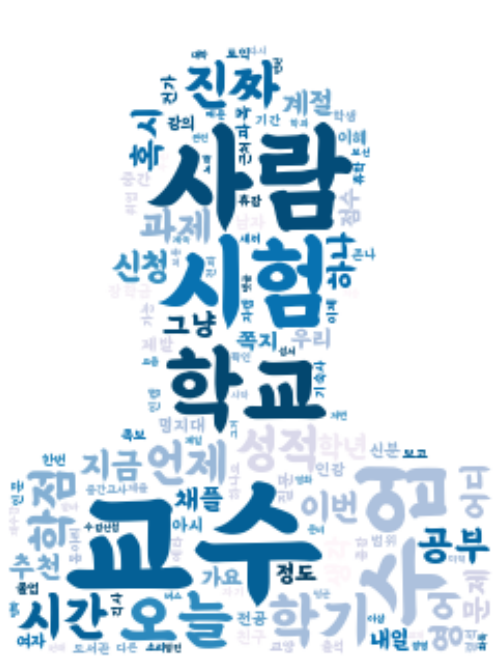

In [23]:
wordcloud = WordCloud(font_path="C:/Users/Kim/Downloads/BMEULJIROTTF.ttf",
                     background_color='white',width=800, height=600,
                     max_words=200, mask=custom_mask, # word의 최대 갯수와 마스크, font-size설정
                     max_font_size=70, colormap='PuBu')
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud, interpolation='bilinear') # 마스크용 이미지의 색으로 워드클라우드 생성
plt.show()

- 주로 교수, 학교, 수업, 시험, 과제 등의 단어가 가장 많이 출현하는 것으로 보아 주로 학업에 관련한 게시물이 많다는 것을 알 수 있었다.
- 사람이라는 단어가 의외로 많이 출현하여 사람이라는 단어가 들어간 게시물을 찾아보니 "~하는사람 ~아는 사람" 등의 게시물에서 비롯된 결과임을 확인하였다.

In [24]:
keyword_corona['title'] = keyword_corona['title'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거
keyword_corona['content'] = keyword_corona['content'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거

okt = Okt()

word_list = []

for i in keyword_corona.title:
    word_list.append(i)
for i in keyword_corona.content:
    word_list.append(i)
    
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)
    
# 명사 사용

noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun"]:
            noun_list.append(word)
            
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:]

from collections import Counter
from wordcloud import WordCloud

counts = Counter(noun_list)
tags = counts.most_common(200)

from urllib import request
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

custom_mask = np.array(Image.open("C:/Users/Kim/Desktop/이력서.jpg"))

from collections import Counter
from wordcloud import WordCloud


# 코로나 이후 워드클라우드

In [25]:
tags = dict(tags)

In [26]:
tags.pop('비대')
tags['비대면']=116
tags.pop('진자')
tags['확진자']=123

{'코로나': 1779, '학교': 442, '장학금': 433, '대면': 286, '학기': 272, '시험': 260, '때문': 256, '사람': 227, '성적': 192, '진짜': 154, '지금': 149, '생각': 144, '학생': 134, '우리': 130, '명지대': 127, '이번': 126, '등록금': 112, '교수': 99, '강의': 95, '휴학': 93, '관련': 90, '수업': 86, '개강': 85, '친구': 84, '대학': 77, '학우': 72, '알바': 70, '그냥': 70, '시간': 70, '과제': 65, '학년': 64, '마스크': 61, '공지': 61, '보고': 61, '원래': 56, '명대': 55, '진행': 55, '여러분': 55, '공부': 52, '계속': 51, '안내': 47, '감염': 47, '혹시': 46, '학점': 46, '만원': 45, '상황': 45, '연기': 44, '정도': 44, '동아리': 44, '다시': 44, '이제': 44, '지급': 43, '온라인': 42, '인강': 41, '특별': 41, '언제': 40, '문제': 40, '신문': 40, '요즘': 40, '다른': 40, '오늘': 39, '졸업': 39, '사태': 38, '봉사': 38, '이유': 37, '인문': 37, '안녕하십니까': 37, '현재': 37, '만약': 35, '올해': 35, '캠퍼스': 35, '건가': 35, '하나': 34, '기사': 34, '한번': 34, '걱정': 34, '운영': 34, '검사': 33, '교회': 33, '설문조사': 33, '취소': 32, '종식': 32, '서울': 31, '신청': 31, '지원': 31, '기준': 31, '대한': 31, '반환': 30, '지방': 30, '바이러스': 29, '중국': 29, '고민': 29, '확진': 29, '취업': 29, '기간': 29, '결과': 29, '과목'

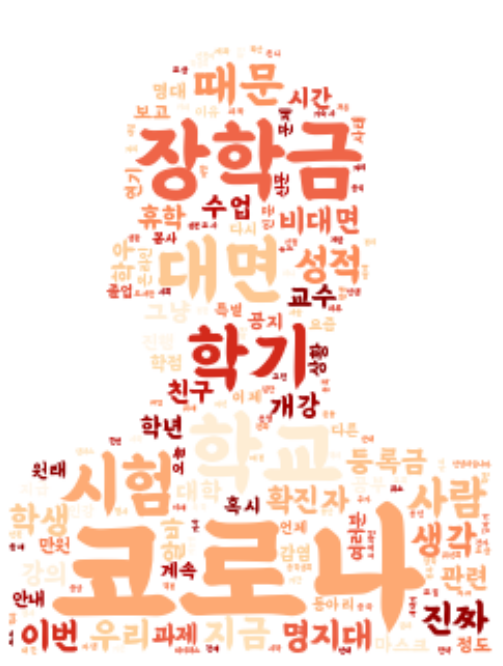

In [162]:
wordcloud = WordCloud(font_path="C:/Users/Kim/Downloads/BMEULJIROTTF.ttf",
                     background_color='white',width=800, height=600,
                     max_words=200, mask=custom_mask, # word의 최대 갯수와 마스크, font-size설정
                     max_font_size=70, colormap='OrRd_r')
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud, interpolation='bilinear') # 마스크용 이미지의 색으로 워드클라우드 생성
plt.show()

- 코로나 이전과 마찬가지로 학업에 관련한 이야기는 지속적으로 나오고 있다.
- 차이점은 장학금에 관련한 단어가 압도적으로 높에 상승한 것을 확인할 수 있었다.
- 친구, 휴학이라는 단어의 출현 빈도가 상승한 것을 확인할 수 있었다.
- ~ 때문, 진짜 등의 무언가를 탓하는 단어도 많이 출현한 것을 확인할 수 있었다.

- 코로나 이전 데이터는 33100개의 게시물에서 휴학이라는 단어가 326번 등장
- 코로나 검색 기준 게시물은 1957건에서 휴학이라는 단어가 93번 등장
- 압도적으로 휴학이라는 단어가 많이 출현한 것을 확인 가능

# 시계열 분석

In [325]:
del after_corona['Unnamed: 0']

In [326]:
after_corona.columns=['vote','comment','date','title','content']

In [327]:
after_corona.iloc[0:10]['date'] = '11/26'

In [328]:
after_corona.head()

,vote,comment,date,title,content
0,0,5,11/26,밑에 애가,문장끝말잇기 안해줌 해줄사람..
1,0,54,11/26,끝말잇기할사람,끝장단어말고 어려운단어쓰지말고
2,0,7,11/26,뮤지컬본다하면,홍광호 vs 조승우
3,0,0,11/26,글경전 이정환교수님,개인프로젝트 기업뭘로해야되나..ㅜ
4,0,0,11/26,유라시아 ㅊㅁㅇ교수님,유라시아 ㅊㅁㅇ 교수님 13주차 과제 기말고사 예상문제 몇개 내야해요??


In [329]:
for i in range(len(after_corona)):
    after_corona['date'].iloc[i] = "2020/"+after_corona['date'].iloc[i]

In [330]:
after_corona.iloc[32000:32006]['date'] = '11/26'

In [331]:
for i in range(32000,32006):
    after_corona['date'].iloc[i] = "2020/"+after_corona['date'].iloc[i]

In [332]:
after_corona = after_corona.drop(32006)

In [333]:
after_corona['date'] = pd.to_datetime(after_corona['date'], format = '%Y-%m-%d')
after_corona['year'] = after_corona['date'].dt.year
after_corona['month'] = after_corona['date'].dt.month
after_corona['day'] = after_corona['date'].dt.day

In [334]:
after_corona

,vote,comment,date,title,content,year,month,day
0,0,5,2020-11-26 00:00:00,밑에 애가,문장끝말잇기 안해줌 해줄사람..,2020,11,26
1,0,54,2020-11-26 00:00:00,끝말잇기할사람,끝장단어말고 어려운단어쓰지말고,2020,11,26
2,0,7,2020-11-26 00:00:00,뮤지컬본다하면,홍광호 vs 조승우,2020,11,26
3,0,0,2020-11-26 00:00:00,글경전 이정환교수님,개인프로젝트 기업뭘로해야되나..ㅜ,2020,11,26
4,0,0,2020-11-26 00:00:00,유라시아 ㅊㅁㅇ교수님,유라시아 ㅊㅁㅇ 교수님 13주차 과제 기말고사 예상문제 몇개 내야해요??,2020,11,26
...,...,...,...,...,...,...,...,...
50455,0,1,2020-06-16 17:52:00,함박관 출구 어디야 알려주세요...,맴맴 돌고 있어요... ㅋㅋ,2020,6,16
50456,0,1,2020-06-16 17:48:00,함박관 차세대나 창조예술관 근처인가용?,아아ㅠㅠ,2020,6,16
50457,0,0,2020-06-16 17:45:00,늦겠누,빨간버스인데 지금 쌍용아파트네...하,2020,6,16
50458,0,0,2020-06-16 17:44:00,ㅈㄱㄴ,kcu성적확인 어캐하나요?,2020,6,16


In [335]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')

# 코로나 이후 월별 명지대 Everytime 게시물

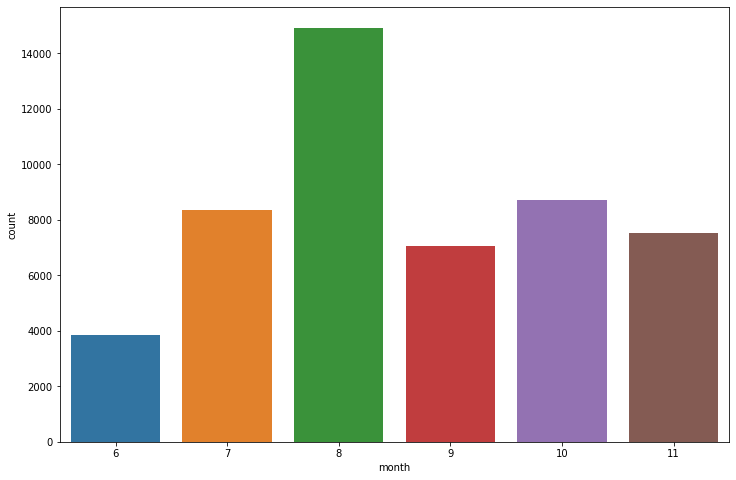

In [337]:
plt.figure(figsize=(12,8))
sns.countplot(data=after_corona, x='month')

In [354]:
del keyword_corona['Unnamed: 0']
keyword_corona.columns=['recommend','comment','date','title','content']

In [355]:
keyword_corona = keyword_corona.drop([1955,1956])

In [356]:
import datetime as dt

for i in range(len(keyword_corona)):
    keyword_corona['date'].iloc[i] = "2020/"+keyword_corona['date'].iloc[i]

keyword_corona['date'] = pd.to_datetime(keyword_corona['date'], format = '%Y-%m-%d %H:%M')
keyword_corona['year'] = keyword_corona['date'].dt.year
keyword_corona['month'] = keyword_corona['date'].dt.month
keyword_corona['day'] = keyword_corona['date'].dt.day
keyword_corona['time'] = keyword_corona['date'].dt.time
keyword_corona['hour'] = keyword_corona['date'].dt.hour
keyword_corona['minute'] = keyword_corona['date'].dt.minute

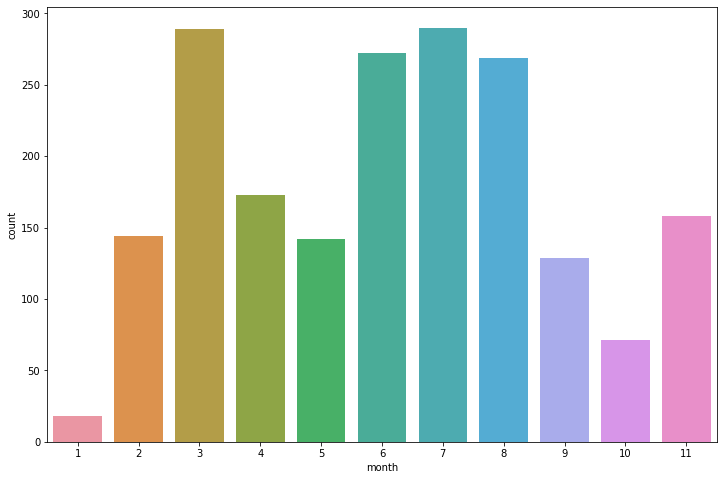

In [357]:
# 코로나 검색 결과 월별 게시물 수 추이
plt.figure(figsize=(12,8))
sns.countplot(data=keyword_corona, x='month')

In [408]:
corona = pd.read_csv("../data/corona/Time.csv")
corona['date'] = pd.to_datetime(corona['date'], format = '%Y-%m-%d %H:%M')
corona['year'] = corona['date'].dt.year
corona['month'] = corona['date'].dt.month
corona['day'] = corona['date'].dt.day
corona['time'] = corona['date'].dt.time
corona['hour'] = corona['date'].dt.hour
corona['minute'] = corona['date'].dt.minute

corona = corona[corona['date']<='2020-04-01']

corona['tomorrow_confirmed'] = corona['confirmed'].shift(-1)
corona['tomorrow_test'] = corona['test'].shift(-1)
corona['tomorrow_deceased'] = corona['deceased'].shift(-1)
corona['fluctuation'] = corona['tomorrow_confirmed'] - corona['confirmed']
corona['fluctuation_test'] = corona['tomorrow_test'] - corona['test']
corona['fluctuation_deceased'] = corona['tomorrow_deceased'] - corona['deceased']

corona = corona.drop(72)

corona_after_may = pd.read_csv("../data/코로나_19_발생현황.csv",  encoding='CP949')
corona_after_may = corona_after_may.transpose()
corona_after_may = corona_after_may.reset_index()
del corona_after_may[0]
del corona_after_may[1]

corona_after_may = corona_after_may.drop(0)
corona_after_may.columns=['date','confirmed']
corona = corona[['date','fluctuation','month']]
corona = corona.rename({'fluctuation':'confirmed'}, axis='columns')

corona_after_may['date'] = corona_after_may['date'].str.replace(".","-")
corona_after_may['date'] = corona_after_may['date'].str.replace(" ","")
corona['date'] = pd.to_datetime(corona['date'], format = '%Y-%m-%d')
corona_after_may['date'] = pd.to_datetime(corona_after_may['date'], format = '%Y-%m-%d')

corona = pd.concat([corona,corona_after_may])

In [409]:
corona

,date,confirmed,month
0,2020-01-20,0,1.0
1,2020-01-21,0,1.0
2,2020-01-22,0,1.0
3,2020-01-23,1,1.0
4,2020-01-24,0,1.0
...,...,...,...
295,2020-11-22,330,NaN
296,2020-11-23,271,NaN
297,2020-11-24,349,NaN
298,2020-11-25,382,NaN


In [410]:
corona['month'] = corona['date'].dt.month

In [413]:
corona['date'] = pd.to_datetime(corona['date'])

In [27]:
corona

,date,confirmed
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,1
3,2020-01-23,1
4,2020-01-24,2
...,...,...
295,2020-11-22,330
296,2020-11-23,271
297,2020-11-24,349
298,2020-11-25,382


DataError: No numeric types to aggregate

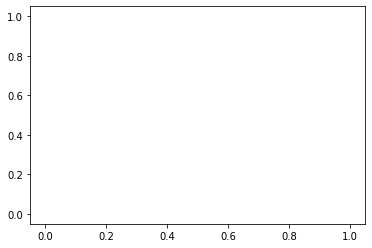

In [417]:
sns.lineplot(data=corona, x='date', y='confirmed')

ValueError: could not convert string to float: '-'

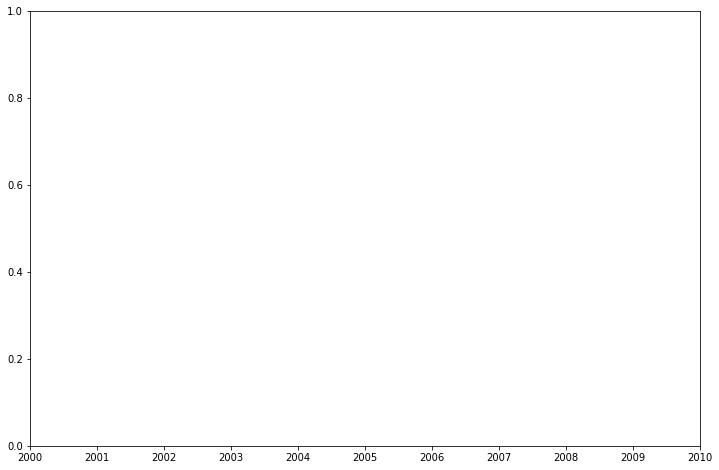

In [415]:
plt.figure(figsize=(12,8))
plt.plot(corona.date, corona['confirmed'], color = 'blue', label='Daily Confimred')
plt.axhline( y = 0, color = 'red', ls = '--')
plt.legend(loc='best')
plt.grid()

In [370]:
corona['tomorrow_confirmed'] = corona['confirmed'].shift(-1)

In [375]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 299
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                312 non-null    datetime64[ns]
 1   confirmed           312 non-null    object        
 2   tomorrow_confirmed  311 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 9.8+ KB


In [380]:
corona = corona.fillna(0)

In [381]:
corona = corona.astype({'confirmed':int})
corona = corona.astype({'tomorrow_confirmed':int})

In [382]:
corona['fluctuation'] = corona['tomorrow_confirmed'] - corona['confirmed']

In [384]:
corona

,date,confirmed,tomorrow_confirmed,fluctuation
0,2020-01-20,1,1,0
1,2020-01-21,1,1,0
2,2020-01-22,1,1,0
3,2020-01-23,1,2,1
4,2020-01-24,2,2,0
...,...,...,...,...
295,2020-11-22,330,271,-59
296,2020-11-23,271,349,78
297,2020-11-24,349,382,33
298,2020-11-25,382,583,201


ValueError: could not convert string to float: '-'

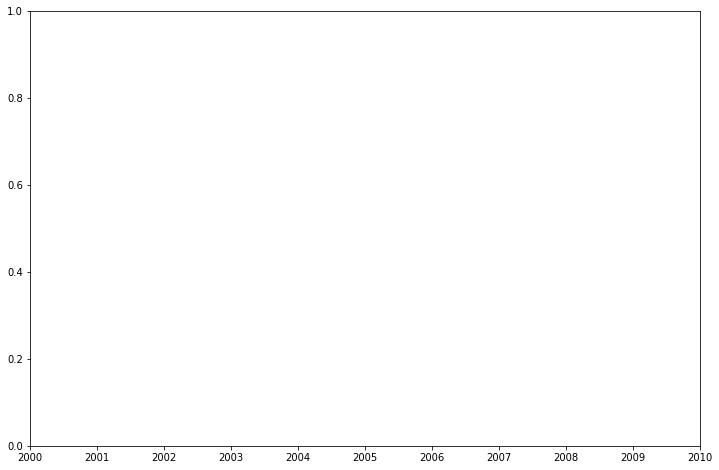

In [407]:
plt.figure(figsize=(12,8))
plt.plot(corona.date, corona['confirmed'], color = 'blue', label='Daily Confimred')
plt.axhline( y = 0, color = 'red', ls = '--')
plt.legend(loc='best')
plt.grid()